### Importing Data and necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from sqlalchemy import create_engine




In [2]:
df = spark.read.csv(r"C:\Users\JKR\Documents\Project-csv\diabetes.csv", header=True, inferSchema=True)

NameError: name 'spark' is not defined

### Transformation

In [ ]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)



In [ ]:
df.columns

['_c0', '_c1', '_c2', '_c3', '_c4', '_c5', '_c6', '_c7', '_c8']

In [ ]:
df.show()

+-----------+-------+-------------+-------------+-------+----+--------------------+---+-------+
|        _c0|    _c1|          _c2|          _c3|    _c4| _c5|                 _c6|_c7|    _c8|
+-----------+-------+-------------+-------------+-------+----+--------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeF...|Age|Outcome|
|          6|    148|           72|           35|      0|33.6|               0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|               0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|               0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|               0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|               2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|               0.201| 30|      0|
|          3|     78|           50|     


### Replacing Null Values

In [ ]:
df.na.drop(how ="any").show()

+-----------+-------+-------------+-------------+-------+----+--------------------+---+-------+
|        _c0|    _c1|          _c2|          _c3|    _c4| _c5|                 _c6|_c7|    _c8|
+-----------+-------+-------------+-------------+-------+----+--------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeF...|Age|Outcome|
|          6|    148|           72|           35|      0|33.6|               0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|               0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|               0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|               0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|               2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|               0.201| 30|      0|
|          3|     78|           50|     

In [ ]:
df.show()

+-----------+-------+-------------+-------------+-------+----+--------------------+---+-------+
|        _c0|    _c1|          _c2|          _c3|    _c4| _c5|                 _c6|_c7|    _c8|
+-----------+-------+-------------+-------------+-------+----+--------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeF...|Age|Outcome|
|          6|    148|           72|           35|      0|33.6|               0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|               0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|               0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|               0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|               2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|               0.201| 30|      0|
|          3|     78|           50|     

In [ ]:
df.na.fill("Silver.ipynb").show()

+-----------+-------+-------------+-------------+-------+----+--------------------+---+-------+
|        _c0|    _c1|          _c2|          _c3|    _c4| _c5|                 _c6|_c7|    _c8|
+-----------+-------+-------------+-------------+-------+----+--------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeF...|Age|Outcome|
|          6|    148|           72|           35|      0|33.6|               0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|               0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|               0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|               0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|               2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|               0.201| 30|      0|
|          3|     78|           50|     

### Simple Pie Chart Representation

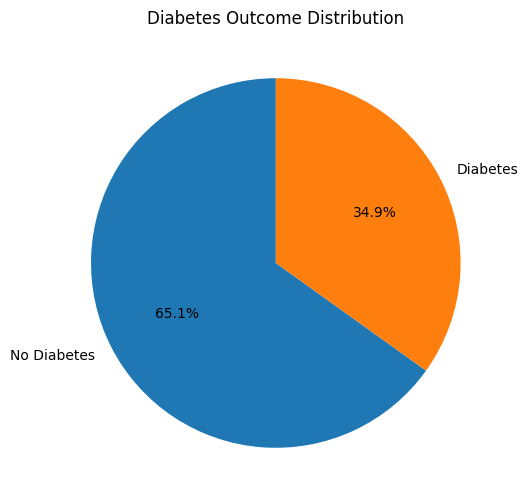

In [ ]:

outcome_counts = df.groupBy("Outcome").count().toPandas()
labels = ['No Diabetes', 'Diabetes']
sizes = outcome_counts.sort_values("Outcome")["count"]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Diabetes Outcome Distribution")
plt.show()


### Filter Operations

In [ ]:
df.show()

+-----------+-------+-------------+-------------+-------+----+--------------------+---+-------+
|        _c0|    _c1|          _c2|          _c3|    _c4| _c5|                 _c6|_c7|    _c8|
+-----------+-------+-------------+-------------+-------+----+--------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeF...|Age|Outcome|
|          6|    148|           72|           35|      0|33.6|               0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|               0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|               0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|               0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|               2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|               0.201| 30|      0|
|          3|     78|           50|     

In [ ]:
df.filter("BMI <= 33").show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|
|          2|    197|           70|           45|    543|30.5|                   0.158| 53|      1|
|          8|    125|           96|            0|      0| 0.0|                   0.232| 54|      1|


### Example of a filter to show

### Adults with an alarming  BMI index

In [ ]:
df.filter((df['Age'] >= 18) | (df['BMI'] >= 24 )).show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


### Aggregate Functions

1. Total number of Pregnancies

In [ ]:
df.groupBy ("Pregnancies").sum().show()

+-----------+----------------+------------+------------------+------------------+------------+------------------+-----------------------------+--------+------------+
|Pregnancies|sum(Pregnancies)|sum(Glucose)|sum(BloodPressure)|sum(SkinThickness)|sum(Insulin)|          sum(BMI)|sum(DiabetesPedigreeFunction)|sum(Age)|sum(Outcome)|
+-----------+----------------+------------+------------------+------------------+------------+------------------+-----------------------------+--------+------------+
|         12|             108|        1022|               687|               244|        1013|             291.1|                        3.999|     427|           4|
|          1|             135|       15221|              9152|              3299|       13321| 4235.300000000001|                       65.677|    3695|          29|
|         13|             130|        1255|               738|               173|         279|             350.0|                        4.633|     445|           5|
|   

In [ ]:
df.groupBy('Pregnancies').count().show()

+-----------+-----+
|Pregnancies|count|
+-----------+-----+
|         12|    9|
|          1|  135|
|         13|   10|
|          6|   50|
|          3|   75|
|          5|   57|
|         15|    1|
|          9|   28|
|         17|    1|
|          4|   68|
|          8|   38|
|          7|   45|
|         10|   24|
|         11|   11|
|         14|    2|
|          2|  103|
|          0|  111|
+-----------+-----+



In [ ]:
df.groupBy('Age').avg().show()

+---+------------------+------------------+------------------+------------------+------------------+------------------+-----------------------------+--------+-------------------+
|Age|  avg(Pregnancies)|      avg(Glucose)|avg(BloodPressure)|avg(SkinThickness)|      avg(Insulin)|          avg(BMI)|avg(DiabetesPedigreeFunction)|avg(Age)|       avg(Outcome)|
+---+------------------+------------------+------------------+------------------+------------------+------------------+-----------------------------+--------+-------------------+
| 31|             3.875|126.95833333333333|            64.375|              20.0|111.16666666666667| 34.01666666666666|           0.5895833333333333|    31.0| 0.5416666666666666|
| 65|3.3333333333333335|             137.0| 78.66666666666667|12.333333333333334|               0.0|31.600000000000005|          0.25899999999999995|    65.0|                0.0|
| 53|               5.4|             158.0|              79.0|              21.2|             183.0|30.50

In [ ]:
pie_chart =  df.groupBy('Age').avg()
pie_chart.show()

+---+------------------+------------------+------------------+------------------+------------------+------------------+-----------------------------+--------+-------------------+
|Age|  avg(Pregnancies)|      avg(Glucose)|avg(BloodPressure)|avg(SkinThickness)|      avg(Insulin)|          avg(BMI)|avg(DiabetesPedigreeFunction)|avg(Age)|       avg(Outcome)|
+---+------------------+------------------+------------------+------------------+------------------+------------------+-----------------------------+--------+-------------------+
| 31|             3.875|126.95833333333333|            64.375|              20.0|111.16666666666667| 34.01666666666666|           0.5895833333333333|    31.0| 0.5416666666666666|
| 65|3.3333333333333335|             137.0| 78.66666666666667|12.333333333333334|               0.0|31.600000000000005|          0.25899999999999995|    65.0|                0.0|
| 53|               5.4|             158.0|              79.0|              21.2|             183.0|30.50

In [ ]:
plt.show()

In [ ]:
df.select("Age","BMI").show()

+---+----+
|Age| BMI|
+---+----+
| 50|33.6|
| 31|26.6|
| 32|23.3|
| 21|28.1|
| 33|43.1|
| 30|25.6|
| 26|31.0|
| 29|35.3|
| 53|30.5|
| 54| 0.0|
| 30|37.6|
| 34|38.0|
| 57|27.1|
| 59|30.1|
| 51|25.8|
| 32|30.0|
| 31|45.8|
| 31|29.6|
| 33|43.3|
| 32|34.6|
+---+----+
only showing top 20 rows


In [ ]:
new_column = df.withColumn("Elderly", df['Age']>= 50).show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|Elderly|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|   true|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|  false|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|  false|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|  false|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|  false|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|  false|
|          3|     78|       

In [ ]:
new_column = df.na.drop(how="any", thresh =2 ).show()


+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|
